In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customer=pd.read_csv(r"D:\python\python Datasets\python Datasets\customers.csv")

In [3]:
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
customer.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
#Data Preprocessing
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
customer.duplicated().sum()

0

In [7]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
customer.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'},inplace=True)

<Axes: >

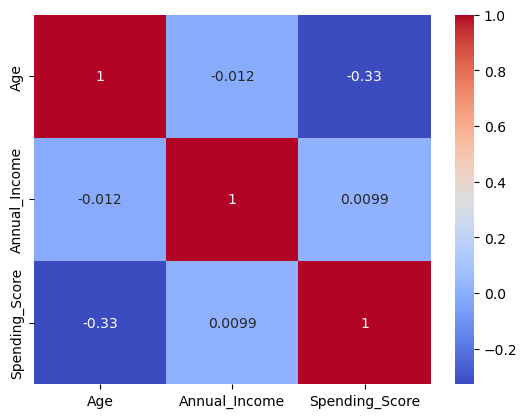

In [9]:
# Finding the correlation between the datas by dropping the customerID which eas unwanted column in the dataset
customer.drop(columns='CustomerID',inplace=True)
sns.heatmap(customer.corr(numeric_only=True),annot=True,cmap='coolwarm')
# There is no highly correlated features

In [10]:
# Visualizing to identify the further insights
customer

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


C:\Users\greep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


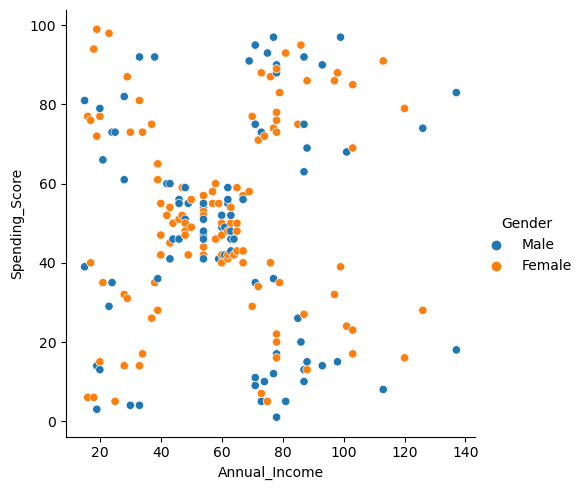

In [11]:
# Establishing relation between Annual Income and Spending Score by Gender Classification
sns.relplot(x=customer['Annual_Income'],y=customer['Spending_Score'],data=customer,kind='scatter',hue='Gender')

<BarContainer object of 2 artists>

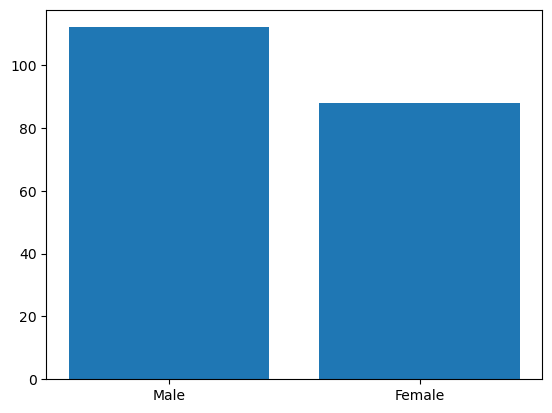

In [12]:
# The no of male data taken for study higher than female
plt.bar(customer['Gender'].unique(),height=customer['Gender'].value_counts())

C:\Users\greep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


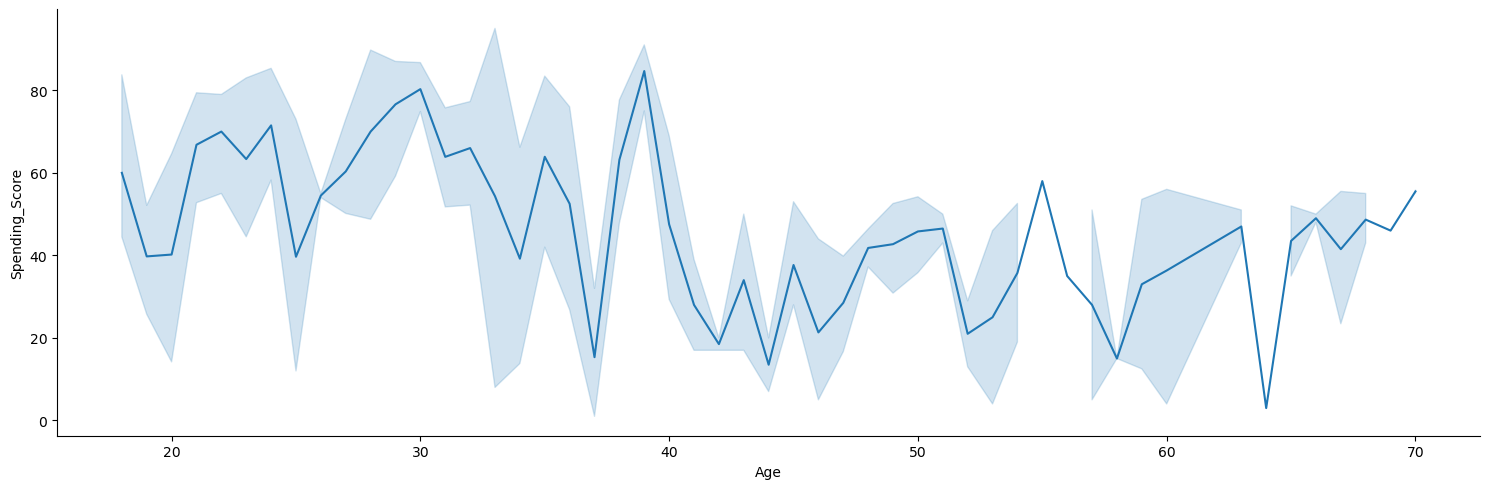

In [13]:
# More persons with Age group between 38 and 43 spends more
sns.relplot(x=customer['Age'],y=customer['Spending_Score'],data=customer,kind='line',height=5,aspect=3)

C:\Users\greep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


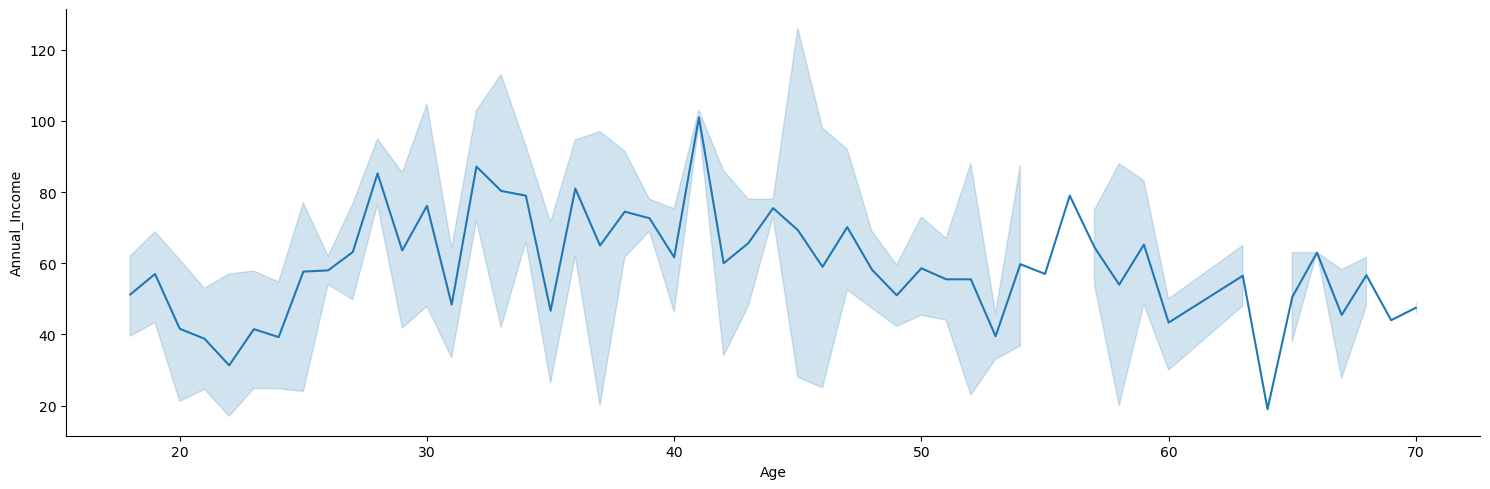

In [36]:
# Annual Income vs Age
sns.relplot(x=customer['Age'],y=customer['Annual_Income'],data=customer,kind='line',height=5,aspect=3)

<Axes: xlabel='Gender', ylabel='Spending_Score'>

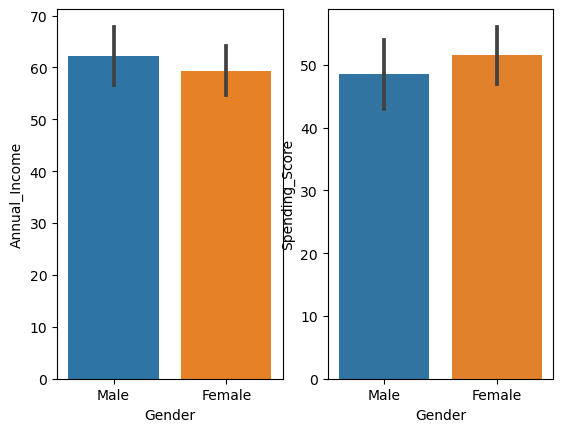

In [14]:
# Comparision between Gender and their Annual Income and Spending Score
plt.subplot(1,2,1)
sns.barplot(x=customer['Gender'],y=customer['Annual_Income'],width=0.8,saturation=0.80)
plt.subplot(1,2,2)
sns.barplot(x=customer['Gender'],y=customer['Spending_Score'])

In [15]:
customer.dtypes

Gender            object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object

In [16]:
# Converting Categorical Variable into Numeric one with the help of Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in customer.columns:
    if customer[col].dtypes=='object':
        customer[col]=le.fit_transform(customer[col])

In [17]:
customer

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [53]:
# Applying KMeans Algorithm to Group them according to their Characteristic

In [18]:
from sklearn.cluster import KMeans

In [19]:
X=customer

In [56]:
# Using elbow mwthood to find the optimum no of clsuters

In [20]:
Wcss = []  
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)  
    Wcss.append(kmeans.inertia_) 

C:\Users\greep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\greep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\greep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\greep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [21]:
Wcss

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51130.69008126376,
 44687.235534005464,
 40857.186675020894,
 37175.97669994118]

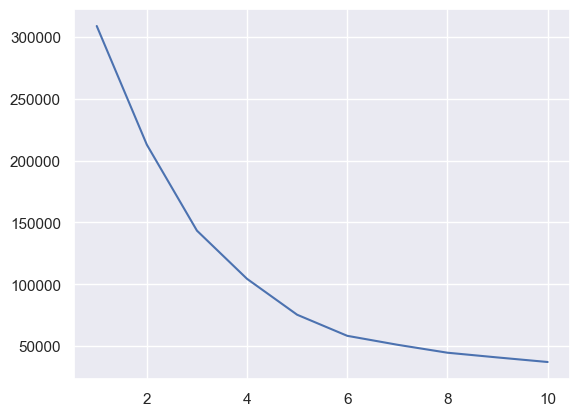

In [22]:
sns.set()
plt.plot(range(1,11),Wcss)
# From the graph we can take no of cluster value as 5

In [44]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
y=kmeans.fit_predict(X)

C:\Users\greep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\greep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
Y=pd.DataFrame(y,columns=['output'])

In [46]:
Y

,output
0,5
1,2
2,5
3,2
4,5
...,...
195,4
196,1
197,4
198,1


In [49]:
result=pd.concat((X,Y),axis=1)

In [50]:
result

,Gender,Age,Annual_Income,Spending_Score,output
0,1,19,15,39,5
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,4
196,0,45,126,28,1
197,1,32,126,74,4
198,1,32,137,18,1


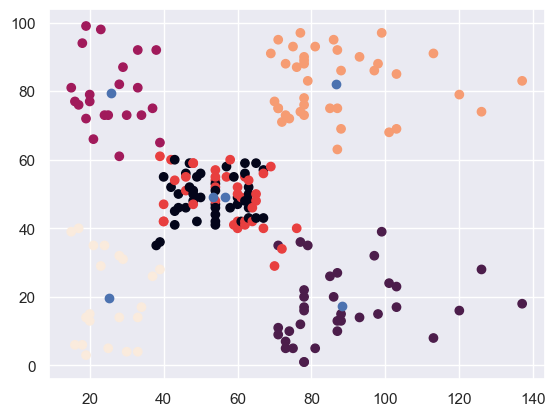

In [51]:
plt.scatter(result.iloc[:,2],result.iloc[:,3],c=y)
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3])

In [52]:
from sklearn.metrics import silhouette_score

In [41]:
result

,Gender,Age,Annual_Income,Spending_Score,output
0,1,19,15,39,5
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,4
196,0,45,126,28,1
197,1,32,126,74,4
198,1,32,137,18,1


In [53]:
silhouette_score(result,kmeans.labels_)
# Here we get silhouette score of 0.45 

0.45382447211876453

In [54]:
#Repeating the same process with cluster No 5
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=42)
y=kmeans.fit_predict(X)

C:\Users\greep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\greep\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
Y=pd.DataFrame(y,columns=['output'])

In [56]:
Y

,output
0,5
1,2
2,5
3,2
4,5
...,...
195,4
196,1
197,4
198,1


In [57]:
result=pd.concat((X,Y),axis=1)

In [58]:
result

,Gender,Age,Annual_Income,Spending_Score,output
0,1,19,15,39,5
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,4
196,0,45,126,28,1
197,1,32,126,74,4
198,1,32,137,18,1


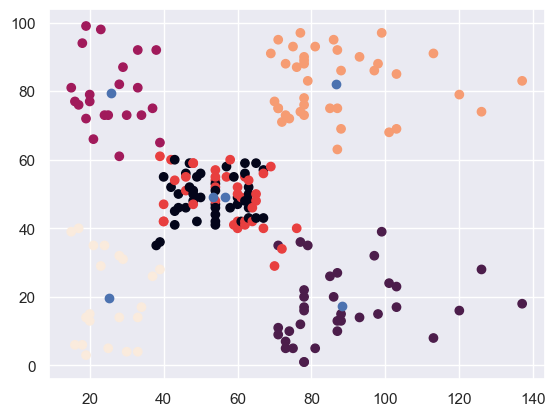

In [59]:
plt.scatter(result.iloc[:,2],result.iloc[:,3],c=y)
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3])

In [60]:
silhouette_score(X,kmeans.labels_)
# Here we get silhouette score of 0.45 

0.45205475380756527

In [61]:
# Clustering with Hierarchy clustering
# Aglomerative Approach

In [62]:
X=customer

In [63]:
X

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [64]:
import scipy.cluster.hierarchy as sch

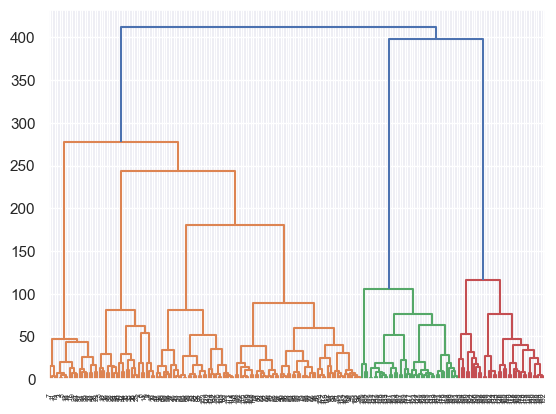

In [65]:
# Finding the optimum no of cluster using ward linkage
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
#Taking 3 as optimum no of cluster proceeding further

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
hc=AgglomerativeClustering(n_clusters=3,linkage='ward')
y=hc.fit_predict(X)

In [68]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [69]:
Y=pd.DataFrame(y,columns=['output'])

In [70]:
result=pd.concat((X,Y),axis=1)

In [71]:
result

,Gender,Age,Annual_Income,Spending_Score,output
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


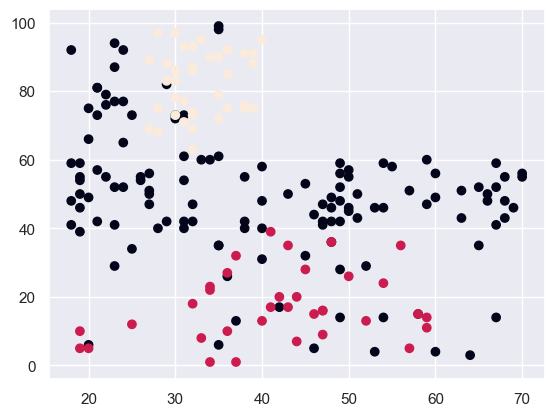

In [72]:
# Plotting and finding relation between age and spending score
plt.scatter(result.iloc[:,1],result.iloc[:,3],c=y)


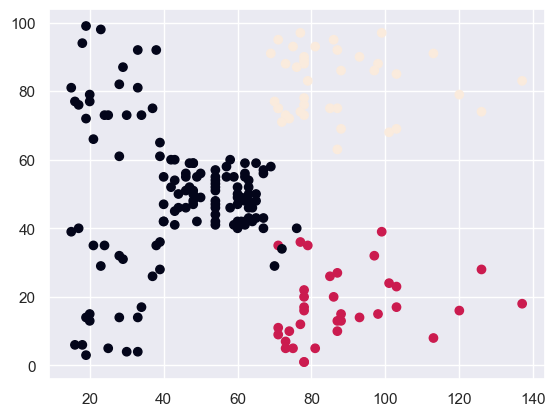

In [73]:
# Finding relation between spending score and Annual Income
plt.scatter(result.iloc[:,2],result.iloc[:,3],c=y)

In [38]:
# Checking with silhouette score

In [74]:
from sklearn.metrics import *

In [75]:
silhouette_score(X,hc.labels_)
#Silhoette score is bad So we can choose 5 as our optimum no of cluster

0.3812859576468096